# Feature engineering
- Feature engineering is a process in machine learning where you manipulate or create new features (input variables) from your existing data to improve the performance of a machine learning model. 
#### or
- the process of transforming raw data into features that are suitable for machine learning models.
-  Effective feature engineering can enhance model accuracy, reduce overfitting, and uncover hidden insights in the data.

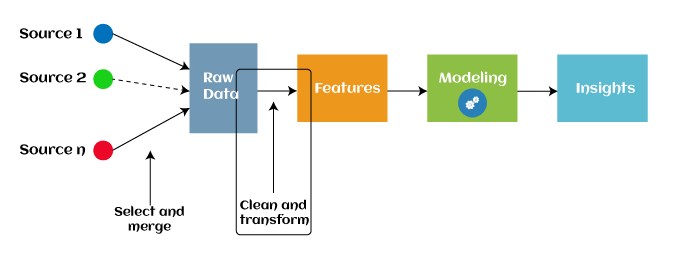

## Why is Feature Engineering so important?

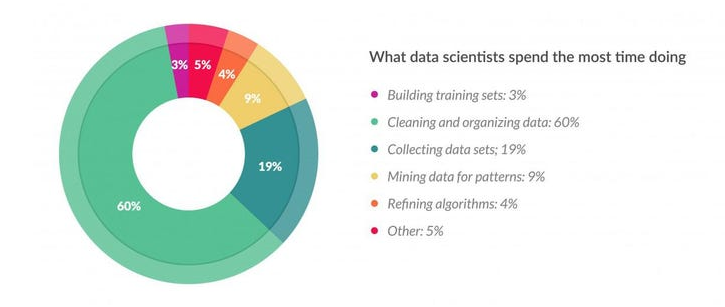

## Benefits of Feature Engineering

- Higher efficiency of the model
- Easier Algorithms that fit the data
- Easier for Algorithms to detect patterns in the data
- Greater Flexibility of the features
- It reduces the training time
- It helps in avoiding the curse of dimensionality

## Feature Engineering Techniques
- Imputation
- Handling Outliers
- Transformation
- One hot encoding
- End of Tail Imputation
- Arbitrary Value Imputation
- Feature Selection

## Types of Missing Values in ML

- In machine learning, missing values are often categorized based on their underlying patterns or reasons for being missing. -     Understanding the types of missing values can guide the choice of appropriate imputation techniques or handling strategies. 

#### Missing Completely at Random (MCAR):

- Definition: The missingness of a variable is **unrelated to the values of any variables, observed or unobserved**.
- Example: A weather station loses some temperature readings due to a random equipment failure.

#### Missing at Random (MAR):

- Definition: The missingness is **related to the values of other observed variables, but not to the missing variable itself**.
- Example: In a survey, income information might be missing for certain demographic groups, but the missingness is related to other observed variables such as education level.

#### Missing Not at Random (MNAR):

- Definition: The missingness is **related to the unobserved values of the variable in question**.
- Example: In a health study, people with high levels of a particular health condition might be less likely to disclose their condition, leading to missing values for that variable.


# Imputation
- Imputation is responsible for handling irregularities within the dataset.

### Mean/Median Imputation
- Replace missing values with the mean, median  of the observed values in the variable.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [5]:
# let's separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((292, 3), (126, 3))

In [6]:
# let's make a function to create 2 variables from Age:
# one filling NA with median, and another one filling NA with zeroes

def impute_na(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    #df[variable+'_zero'] = df[variable].fillna(0) 

In [7]:
median = X_train.Age.median()
median

28.0

In [8]:
#calling a function
impute_na(X_train, 'Age', median)
X_train.head(15)

,Survived,Age,Fare,Age_median
96,1,76.00,78.8500,76.00
381,0,26.00,7.8792,26.00
89,0,2.00,23.0000,2.00
233,0,NaN,7.8792,28.00
191,0,NaN,26.0000,28.00
354,1,0.17,20.5750,0.17
253,0,24.00,9.3250,24.00
92,1,27.00,52.0000,27.00
240,1,55.00,27.7208,55.00
194,0,8.00,32.5000,8.00


In [14]:
# we can see a change in the variance after imputation

print('Original Variance: ', X_train['Age'].std())
print('Variance after median imputation: ', X_train['Age_median'].std())

Original Variance:  14.41094949914832
Variance after median imputation:  12.987476826688752


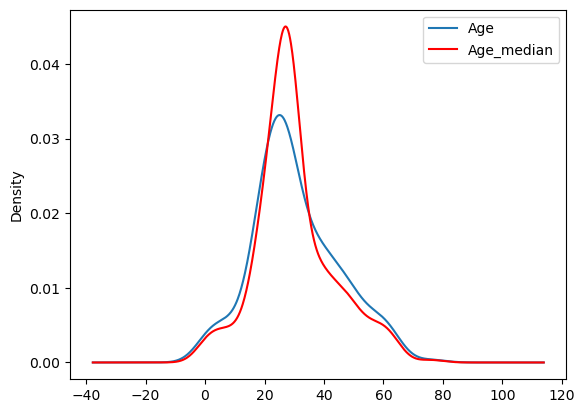

In [15]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Handling Outliers

#### Outliers
- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.


In [9]:
# let's load the titanic dataset
import seaborn as sns
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

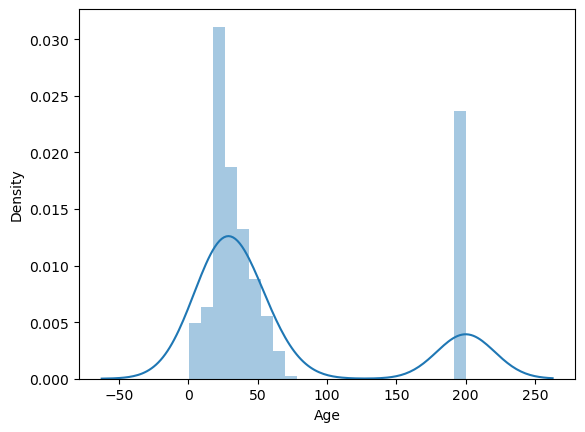

In [10]:
sns.distplot(data.Age.fillna(200))

Text(0, 0.5, 'Number of Passengers')

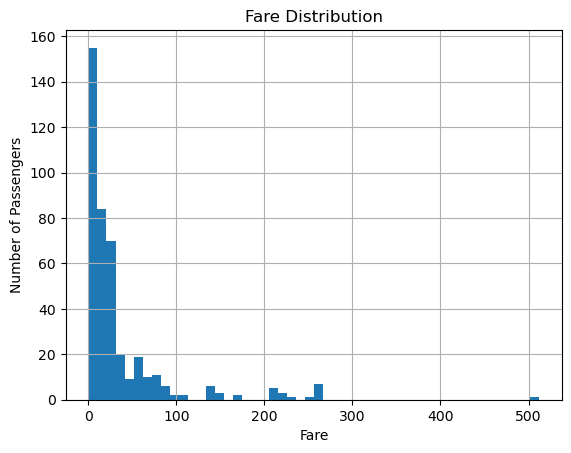

In [10]:
# First let's plot a histogram to get an idea of the distribution

fig = data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Fare')

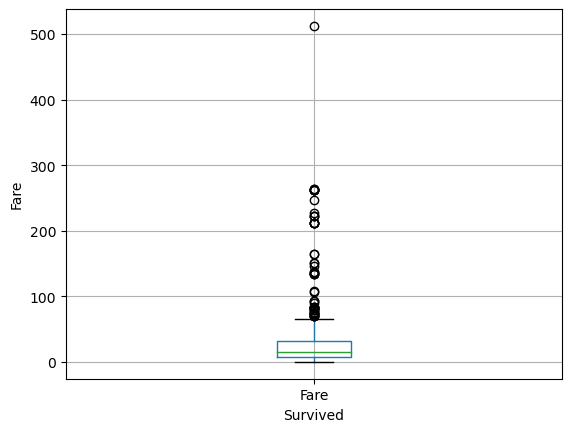

In [11]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

In [25]:
# let's look at the values of the quantiles so we can
# calculate the upper and lower boundaries for the outliers

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [12]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(66.9063, -27.5105, 23.6042)

In [13]:
# lets look at the actual number of passengers on the upper Fare ranges

print('total passengers: {}'.format(data.shape[0]))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0]))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0]))

total passengers: 418
passengers that paid more than 65: 55
passengers that paid more than 100: 31


In [27]:
import numpy as np
# and percentages of passengers
total_passengers = np.float32(data.shape[0])

print('total passengers: {}'.format(data.shape[0] / total_passengers))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0] / total_passengers))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0] / total_passengers))

total passengers: 1.0
passengers that paid more than 65: 0.13157894736842105
passengers that paid more than 100: 0.07416267942583732


In [28]:
# let's create a separate dataframe for high fare payers
high_fare_df = data[data.Fare>100]

# ticket: it indicates the people that bought their fares together
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      4
113781      2
13508       2
16966       3
19950       2
24160       1
36928       2
PC 17483    3
PC 17558    1
PC 17569    1
PC 17608    5
PC 17755    1
PC 17757    1
PC 17758    1
PC 17760    1
PC 17761    1
Name: Fare, dtype: int64

In [29]:
multiple_tickets = pd.concat(
    [
        high_fare_df.groupby('Ticket')['Fare'].count(),
        high_fare_df.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
113503,4,211.5000
113781,2,151.5500
13508,2,136.7792
16966,3,134.5000
19950,2,263.0000
24160,1,211.3375
36928,2,164.8667
PC 17483,3,221.7792
PC 17558,1,247.5208


In [30]:
# let's have a look at the most extreme outliers
data[data.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Text(0, 0.5, 'Number of Passengers')

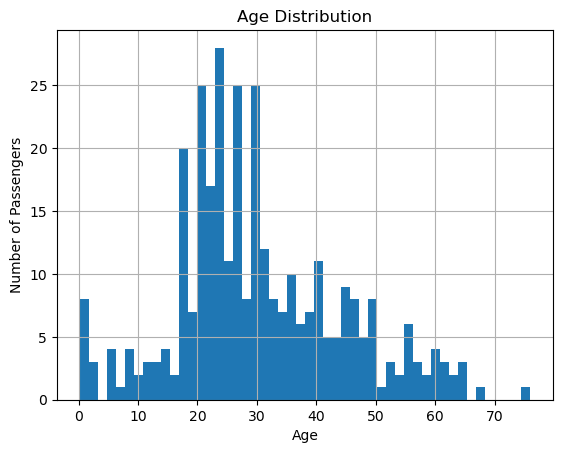

In [31]:
# First let's plot the histogram to get an idea of the distribution

fig = data.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Age')

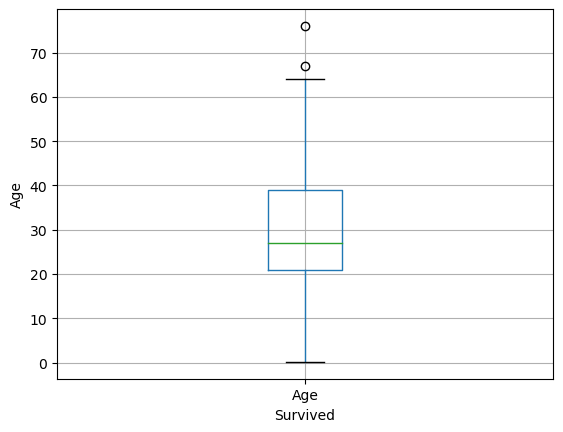

In [32]:
# now let's plot the boxplots and whiskers to visualise
# outliers

# remember that the dots in the plot indicate outliers,
# the box the interquantile range, and the whikers the 
# range IQR + or - 1.5 times the quantiles

fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

In [33]:
# let's visualise median and quantiles

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [34]:
# Let's calculate the boundaries outside which sit the outliers
# assuming Age follows a Gaussian distribution

Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()

Upper_boundary, Lower_boundary

(72.81621806831905, -12.271037345427477)

In [35]:
# now let's use the interquantile range to calculate the boundaries

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Age.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(66.0, -6.0, 18.0)

# Transformation

-  transformation refers to the process of modifying or creating new features (variables) from the existing ones to improve the performance of machine learning models. 
- The goal is to enhance the information content, reduce noise, and make the data more suitable for the algorithms.

### Types of Transformation
- logarithmic transformation
- exponential transformation 
- boxcox transformation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

In [6]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head(15)

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
5,0,14.0,9.2250
6,1,30.0,7.6292
7,0,26.0,29.0000
8,1,18.0,7.2292
9,0,21.0,24.1500


In [3]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [4]:
# fill na
data['Age'] = impute_na(data, 'Age')
data.head(20)

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
5,0,14.0,9.2250
6,1,30.0,7.6292
7,0,26.0,29.0000
8,1,18.0,7.2292
9,0,21.0,24.1500


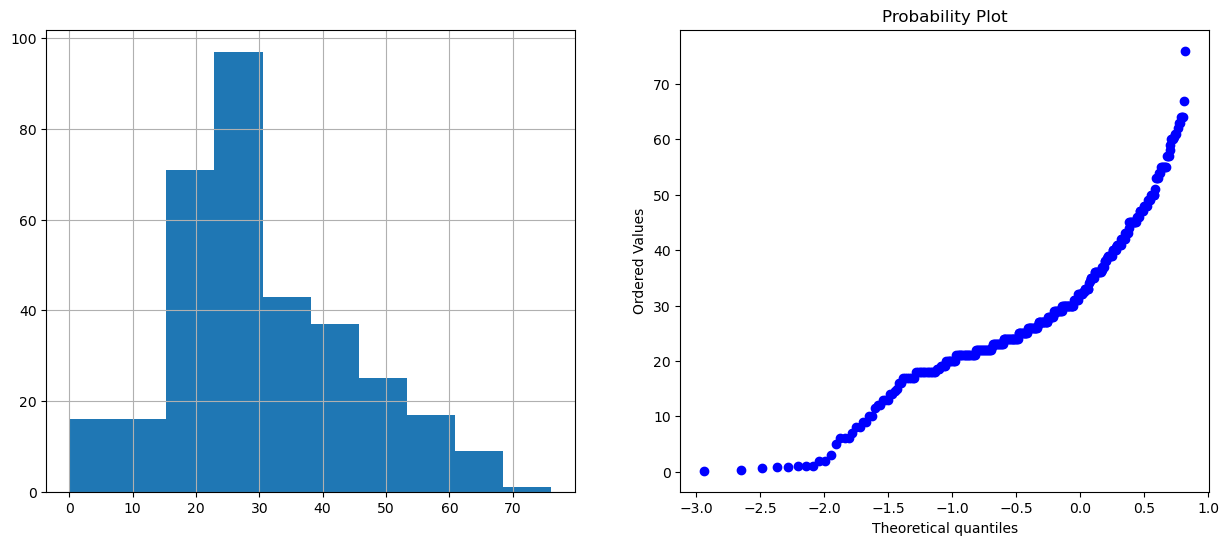

In [8]:
# plot the histograms to have a quick look at the distributions
# we can plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')

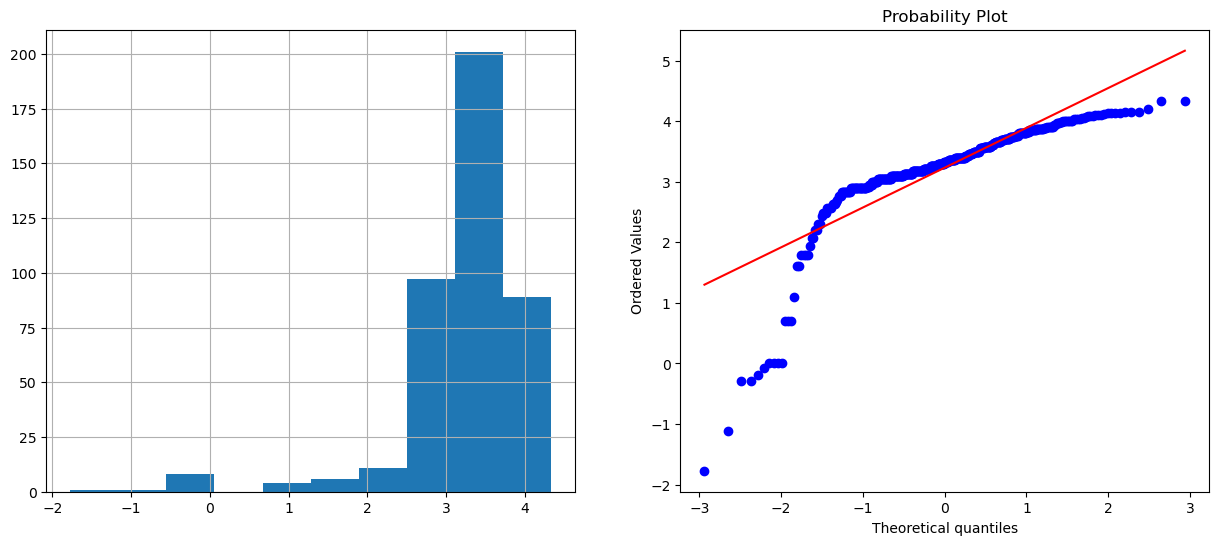

In [37]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

diagnostic_plots(data, 'Age_log')

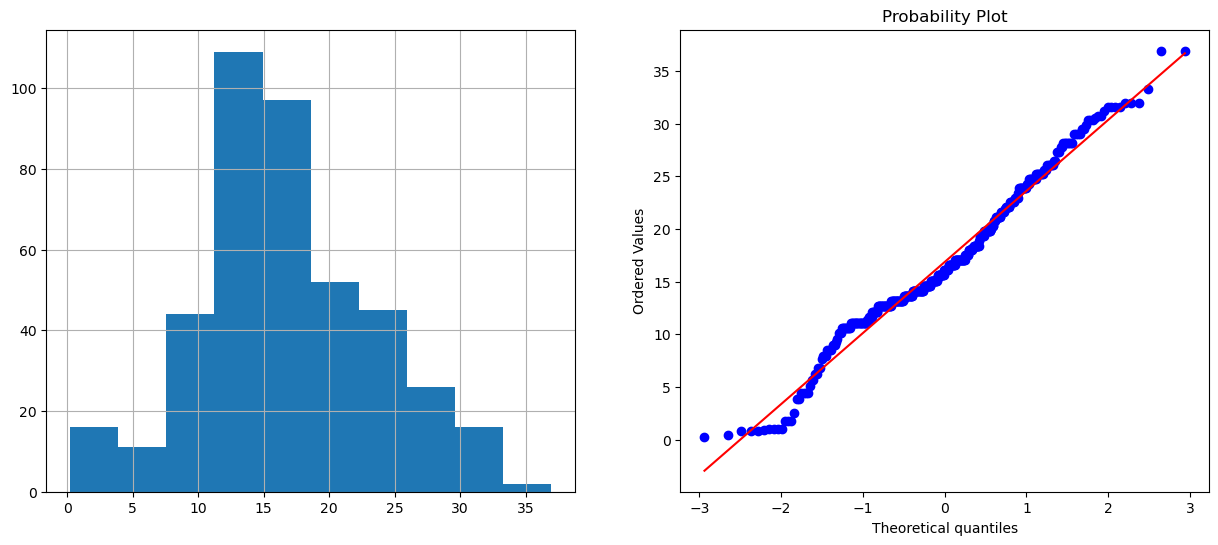

In [38]:
data['Age_exp'] = data.Age**(1/1.2) # you can vary the exponent as needed

diagnostic_plots(data, 'Age_exp')

#### BoxCox transformation
- The Box-Cox transformation is defined as:

- T(Y)=(Y exp(λ)−1)/λ
- where Y is the response variable and λ is the transformation parameter.
- λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

Optimal λ:  0.7445660266236372


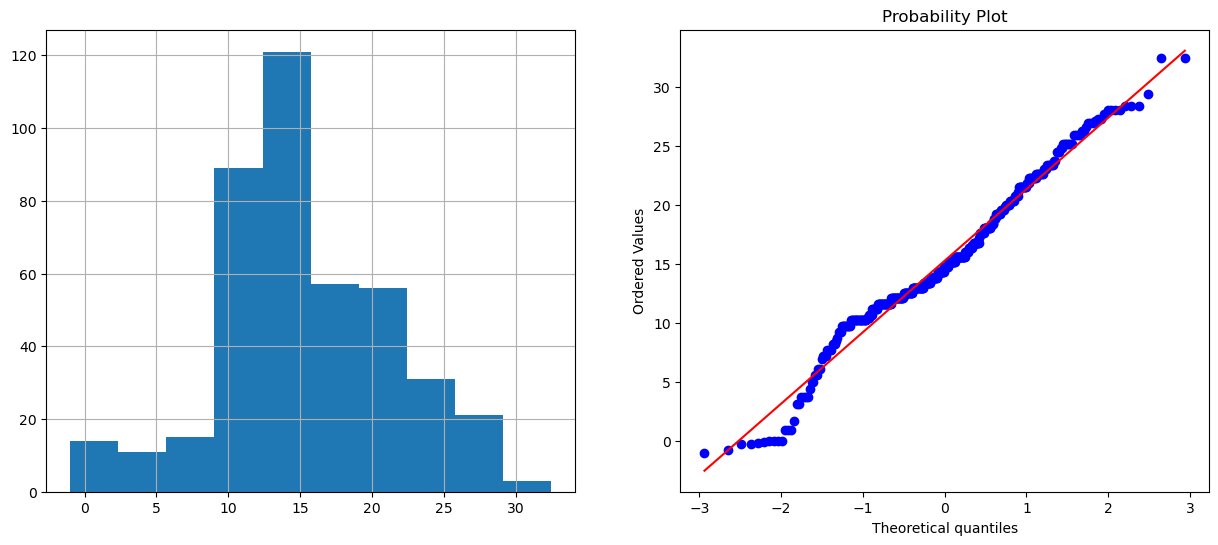

In [39]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'Age_boxcox')

# One hot encoding
- One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

- Each one of the boolean variables are also known as dummy variables or binary variables.

In [40]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols = ['Sex'])
data.head()

,Sex
0,male
1,female
2,male
3,male
4,female


In [41]:
from sklearn.preprocessing import LabelEncoder


In [42]:
Enc = LabelEncoder()

data['Sex_label'] = pd.DataFrame(Enc.fit_transform(data['Sex']))

In [43]:
data.head()

,Sex,Sex_label
0,male,1
1,female,0
2,male,1
3,male,1
4,female,0


# End of the distribution imputation

- End-of-distribution imputation is a technique used to handle missing values in a dataset by replacing them with values from the extreme end of the distribution. 
- This approach is often applied when the missing values are assumed to be related to extreme or rare events. 
- The goal is to avoid underestimating the impact of these extreme values on the analysis.



In [14]:
# load the Titanic Dataset with a few variables for demonstration
import pandas as pd
data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [15]:
# let's look at the percentage of NA
data.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [16]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((292, 3), (126, 3))

<Axes: >

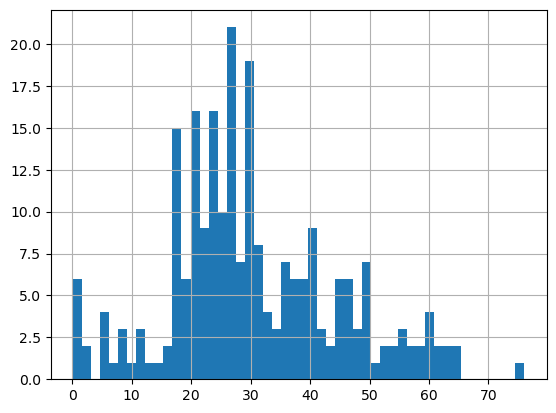

In [17]:
X_train.Age.hist(bins=50)

In [6]:
# far end of the distribution
X_train.Age.mean()+3*X_train.Age.std()

73.72259426015682

# Arbitrary Value Imputation

- Arbitrary value imputation is a technique used to **fill missing values in a dataset by replacing them with a manually chosen or arbitrary value**. 
- This method is often employed when missing data is assumed to be **missing completely at random**, and the goal is to quickly fill the gaps in the dataset without introducing complex imputation strategies.

In [11]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [13]:
# let's look at the percentage of NA
data.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [14]:
data['Age'].mean()

30.272590361445783

In [15]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((292, 3), (126, 3))

In [16]:
#create a function for Arbitrary Value
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)
    

In [17]:
# let's replace the NA with the median value in the training set
impute_na(X_train, 'Age')
impute_na(X_test, 'Age')

X_train.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
96,1,76.00,78.8500,76.00,76.00
381,0,26.00,7.8792,26.00,26.00
89,0,2.00,23.0000,2.00,2.00
233,0,NaN,7.8792,0.00,100.00
191,0,NaN,26.0000,0.00,100.00
354,1,0.17,20.5750,0.17,0.17
253,0,24.00,9.3250,24.00,24.00
92,1,27.00,52.0000,27.00,27.00
240,1,55.00,27.7208,55.00,55.00
194,0,8.00,32.5000,8.00,8.00


# Feature Selection

- Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction

#### Feature Selection Techniques

Normalization
- Standardization
- MinMax scaling

## Normalization

- Normalization rescales the values of numerical features to a range between 0 and 1. 
- It is particularly useful when the features have different ranges and units. 
- The formula for normalization is:
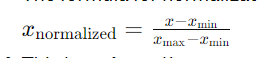

### Standarisation
- Standardization transforms the values of numerical features to have a mean of 0 and a standard deviation of 1. 
- It is useful when the features have different scales and follows a Gaussian distribution (bell curve).

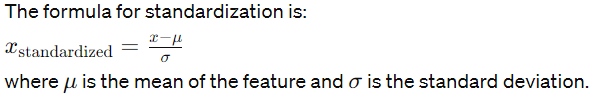



In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,34.5,7.8292
1,1,3,47.0,7.0000
2,0,2,62.0,9.6875
3,0,3,27.0,8.6625
4,1,3,22.0,12.2875


In [19]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,332.000000,417.000000
mean,0.363636,2.265550,30.272590,35.627188
std,0.481622,0.841838,14.181209,55.907576
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,39.000000,31.500000
max,1.000000,3.000000,76.000000,512.329200


In [20]:
# let's look at missing data

data.isnull().sum()

Survived     0
Pclass       0
Age         86
Fare         1
dtype: int64

In [21]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((292, 3), (126, 3))

In [22]:
# let's fill first the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

In [23]:
# standarisation: we use the StandardScaler from sklearn

scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

In [24]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [ 1.82502415e-17 -9.73346213e-17             nan]
std (Pclass, Age and Fare):  [ 1.  1. nan]


### MinMax scaling
- MinMax scaling, also known as min-max normalization, is a popular technique used in feature engineering to scale numerical features to a specific range. 
- It rescales the values of numerical features to a range between 0 and 1.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head(20)


,Survived,Pclass,Age,Fare
0,0.0,1.0,0.452723,0.015282
1,1.0,1.0,0.617566,0.013663
2,0.0,0.5,0.815377,0.018909
3,0.0,1.0,0.353818,0.016908
4,1.0,1.0,0.287881,0.023984
5,0.0,1.0,0.182382,0.018006
6,1.0,1.0,0.393380,0.014891
7,0.0,0.5,0.340630,0.056604
8,1.0,1.0,0.235131,0.014110
9,0.0,1.0,0.274693,0.047138
